# The research of the potentially popular product 

`Strimchik` is an online store, which sells computer games around the world. We are provided with the data of game sales date, user and expert ratings, genres and platforms (such as Xbox or PlayStation).

It is necessary to identify patterns that determine the success of the game. This will allow us to bid on a potentially popular product and plan advertising campaigns.

We have data up to 2016. Let's say it's December 2016 and we're planning a campaign for 2017. It is necessary to work out the principle of working with data.

The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

The aim of the research is to test two hypotheses.

- The average user ratings of the Xbox One and PC platforms are the same;
- The average user ratings of the genres Action and Sports are different.

The research will take place in four stages:

- Data overview
- Data preprocessing
- Exploratory data analysis
- Statistical data analysis. Hypothesis examination.


## Data overview

In [6]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

In [8]:
def info(df):
    display(df.info())
    print(100*'=')
    display(df.describe())
    print(100*'=')
    print(f'Number of null values: {df.isna().mean()}')
    print(100*'=')
    print(f'Number of duplicates: {df.duplicated().sum()}')
    print(100*'=')
    display(df.head())
display(info(df))     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Number of null values: Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64
Number of duplicates: 0


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


None

**Conclusion**

Based on the data in the table, we can conclude that before analysis, it is necessary to perform preprocessing.

The data types in the columns are `int`, `object`, `float`.

According to the data documentation:

`Name` is the name of the game

`Platform` — platform

`Year_of_Release` is the year of release

`Genre` — game genre

`NA_sales` - sales in North America (millions of copies sold)

`EU_sales` - sales in Europe (millions of copies sold)

`JP_sales` - sales in Japan (millions of copies sold)

`Other_sales` - sales in other countries (millions of copies sold)

`Critic_Score` - critical score (maximum 100)

`User_Score` - user score (maximum 10)

`Rating` - rating from the ESRB organization (Eng. Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Data for 2016 may not be complete.

- It is necessary to change the data type in the following columns `Year_of_Release`, `User_Score`.
- There are missing values in the data, it should be examined and replaced if necessary.
- It is necessary to replace column names (bring to lower case)

## Data preprocessing

In [9]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
df.columns = [c.lower() for c in df.columns]

In [13]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [15]:
df['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [16]:
df.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)

Nan values should be dropped in the columns `year_of_release`, `name`, `genre`, because missing values are less than 10%.

In [17]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [18]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [19]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [20]:
df.loc[df['user_score'] =='tbd','user_score'] = np.nan

The value `tbd` means `to be discussed`, thus we can replace it with Nan.

In [21]:
df['user_score'] = df['user_score'].astype(float)

In [22]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [23]:
df['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [24]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
dtype: float64

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Conclusion**

During preprocessing, the following operations were performed.

- The names of the columns were brought to the lower register.
- The data type in years was changed to `int`, and `user_score` to ``float`.
- Rows with missing values in columns `year_of_release`, `name`, `genre` were dropped off, since the percentage of missing values is small.
- The `tbd` values in `user_score` were changed to Nan, since `tbd` indicates that the score information was not originally stated.

## Exploratory data analysis

### Total sales in all regions

In [26]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Studying the release of games and sales in different years

In [28]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

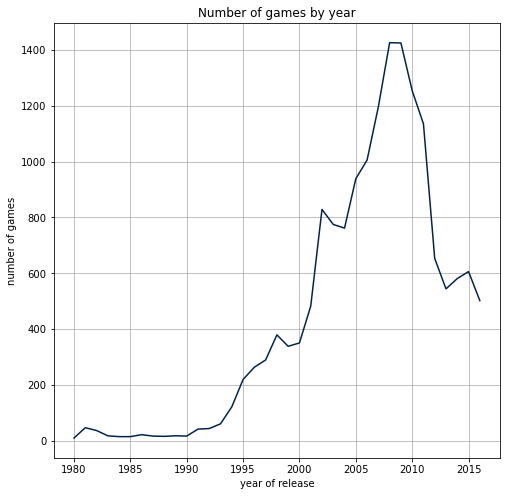

In [30]:
plt.figure(figsize=(8,8))
df.groupby('year_of_release')['name'].count().plot(colormap='cividis', grid=True)
plt.title('Number of games by year')
plt.xlabel('year of release')
plt.ylabel('number of games')
plt.show();

In [31]:
df.groupby('platform')['total_sales'].agg(['count','mean']).sort_values(['count'], ascending=False)

,count,mean
platform,,
PS2,2127,0.579953
DS,2121,0.378491
PS3,1306,0.713124
Wii,1286,0.692986
X360,1232,0.780227
PSP,1193,0.242691
PS,1190,0.611412
PC,957,0.267252
GBA,811,0.385795


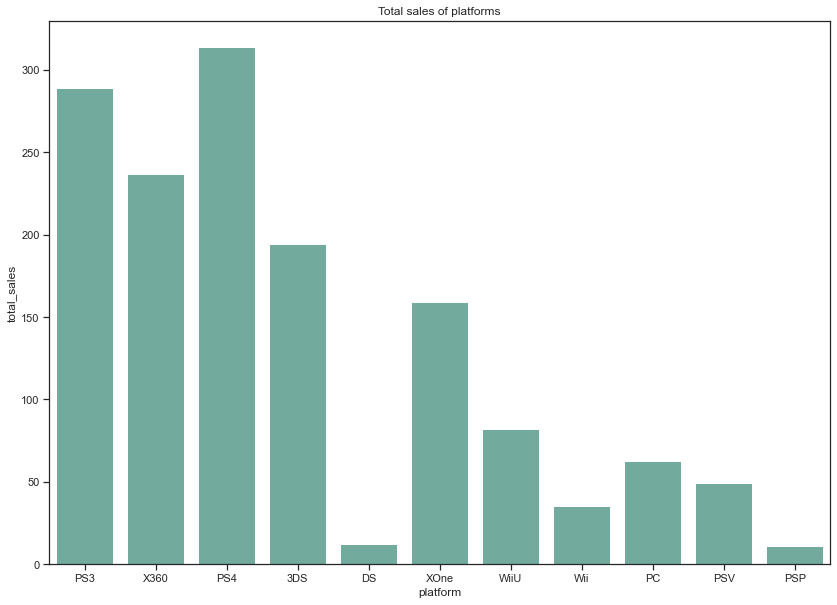

In [40]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y=df['total_sales'], 
    x=df['platform'], 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2').set(title='Total sales of platforms');

As we can see, the most profitable platforms are `PS2`, `DS`, `PS3`, `Wii`, `X360`, `PS2`, `PS`. Let's take a closer look at these platforms.

In [33]:
platforms = ['PS2','DS','PS3','Wii','X360','PS2','PS']
df_new = df.query('platform in @platforms')

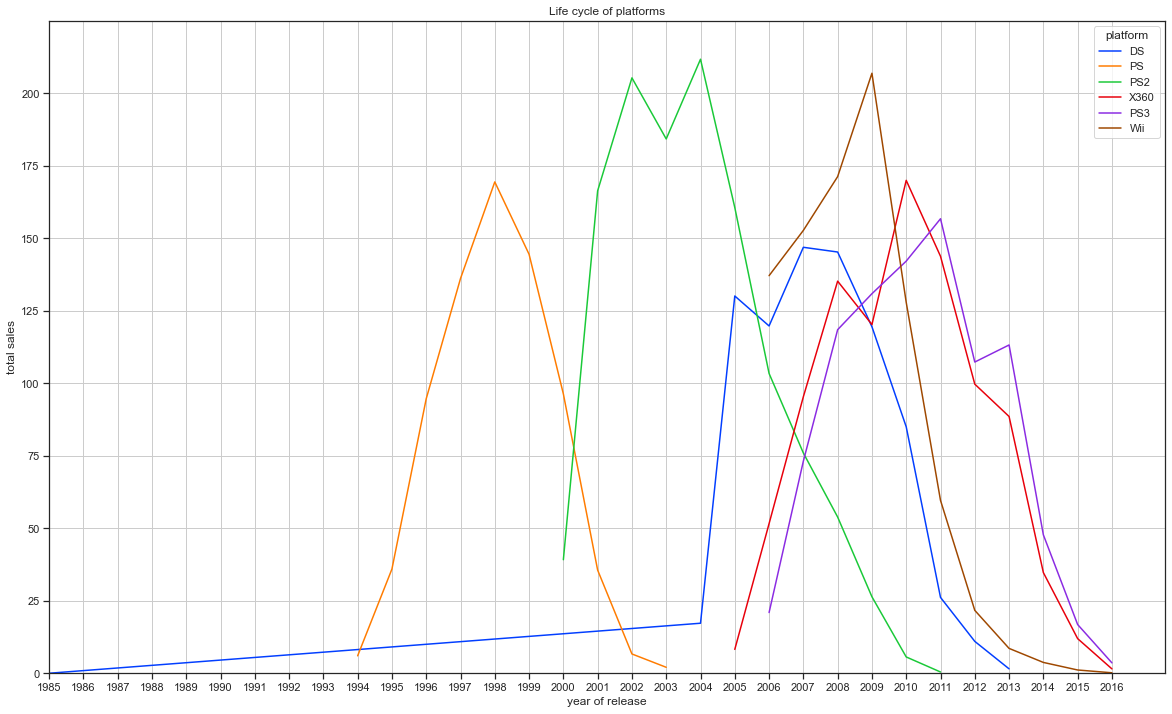

In [62]:
import seaborn as sns

plt.figure(figsize=(20,12))
sns.set(style="ticks")
sns.lineplot(data = df_new.groupby(['year_of_release', 'platform']).agg({'total_sales': 'sum'}).reset_index(),
             x = 'year_of_release', y = 'total_sales', hue = 'platform', palette="bright")
plt.title('Life cycle of platforms')
plt.xlabel('year of release')
plt.ylabel('total sales')
plt.grid()
plt.xticks(np.arange(1980, 2017, 1)) 
plt.yticks(np.arange(0, 225, 25))
plt.ylim(0, 225)
plt.xlim(1985,);

The graph shows that the average life cycle of the platform is 9-11 years, so we need to consider the period from 2012, as we can see the rise and fall in game sales on various platforms, and this will help us make a more accurate forecast for the next year .

### Examining data for the current period

In [35]:
df = df.query('year_of_release >= 2012')

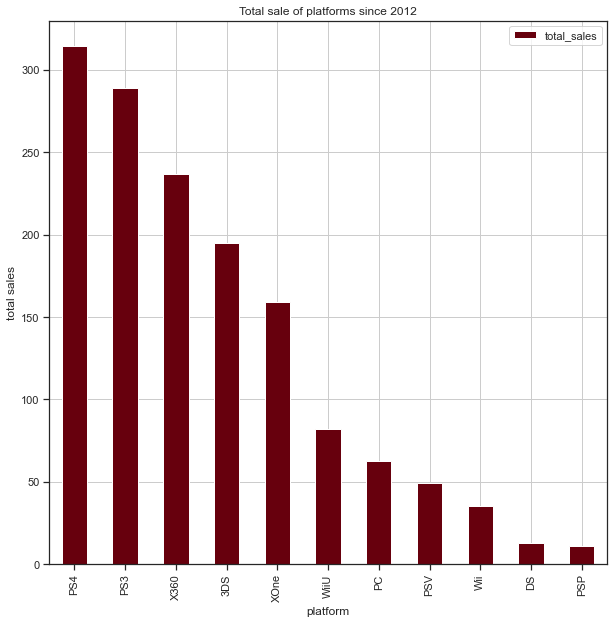

In [41]:
pd.pivot_table(df, values = 'total_sales', index = 'platform', aggfunc = 'sum').sort_values('total_sales', ascending=False).plot(
                kind='bar', title='platform sales', figsize=(10,10), colormap='Reds_r'
                )
plt.grid()

plt.title('Total sales of platforms since 2012')
plt.xlabel('platform')
plt.ylabel('total sales')
plt.show();

Priority platforms are `PS4`, `PS3`, `X360`, `XDS`, `XONE`. Let's look at how sales have changed since 2012.

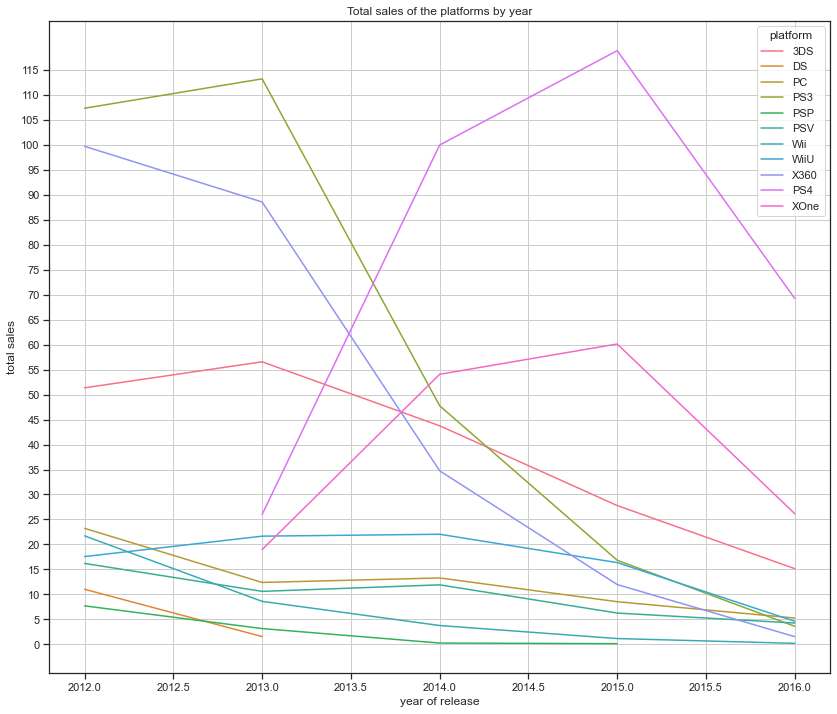

In [42]:
plt.figure(figsize=(14,12))
sns.lineplot(data = df.groupby(['year_of_release', 'platform']).agg({'total_sales': 'sum'}).reset_index(),
             x = 'year_of_release', y = 'total_sales', hue = 'platform')
plt.title('Total sales of the platforms by year')
plt.xlabel('year of release')
plt.ylabel('total sales')
plt.grid()

plt.yticks(np.arange(0, 120, 5))
plt.show()

It can be noted that from 2012 to 2015 there was an increase in total sales (especially, the `PS4`, `XOne` platforms), but starting from 2015, sales on all platforms fell.

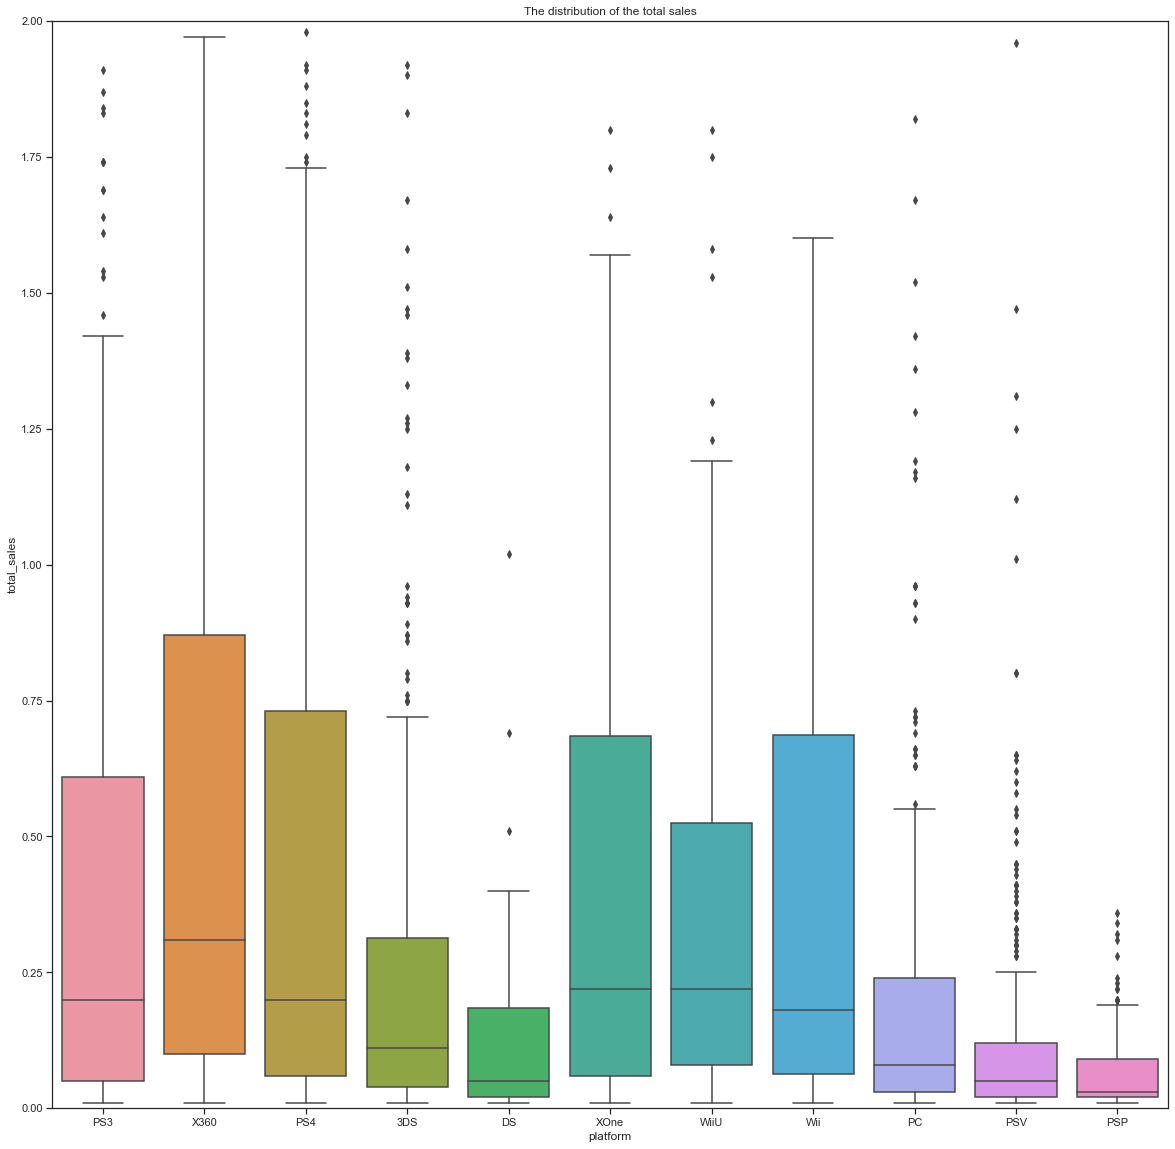

In [43]:
plt.figure(figsize=(20,20))
plt.ylim(0,2)
plt.title('The distribution of the total sales')
sns.boxplot(x='platform',y='total_sales',data=df);

Here we see that the most popular platforms are `X360`, `PS3`, `XOne`, `WiiU`, `Wii`.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


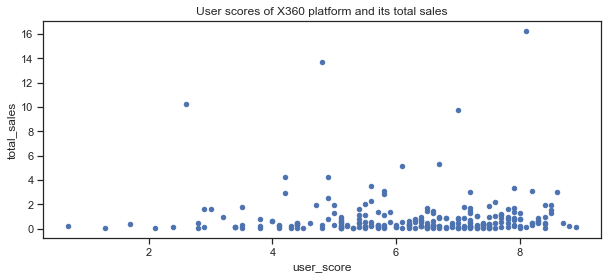

In [48]:
df.query('platform=="X360"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4))
plt.title('User scores of X360 platform and its total sales')
plt.show;

User rating depends on total sales, the higher this number, the higher the rating of users.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


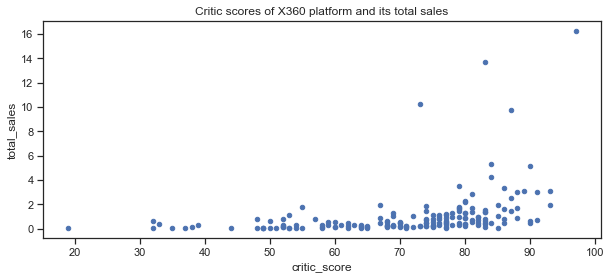

In [49]:
df.query('platform=="X360"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4))
plt.title('Critic scores of X360 platform and its total sales')
plt.show;

The same can be said about the score of critics. When high critical score occurs, sales increase.

In [50]:
X360_data = df.query('platform=="X360"')

In [51]:
X360_data[['total_sales','critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000


The correlation is positive, which indicates a direct link between sales and the ratings of users and critics. The higher the scores, the higher the total sales and vice versa.

###  Studying game genres

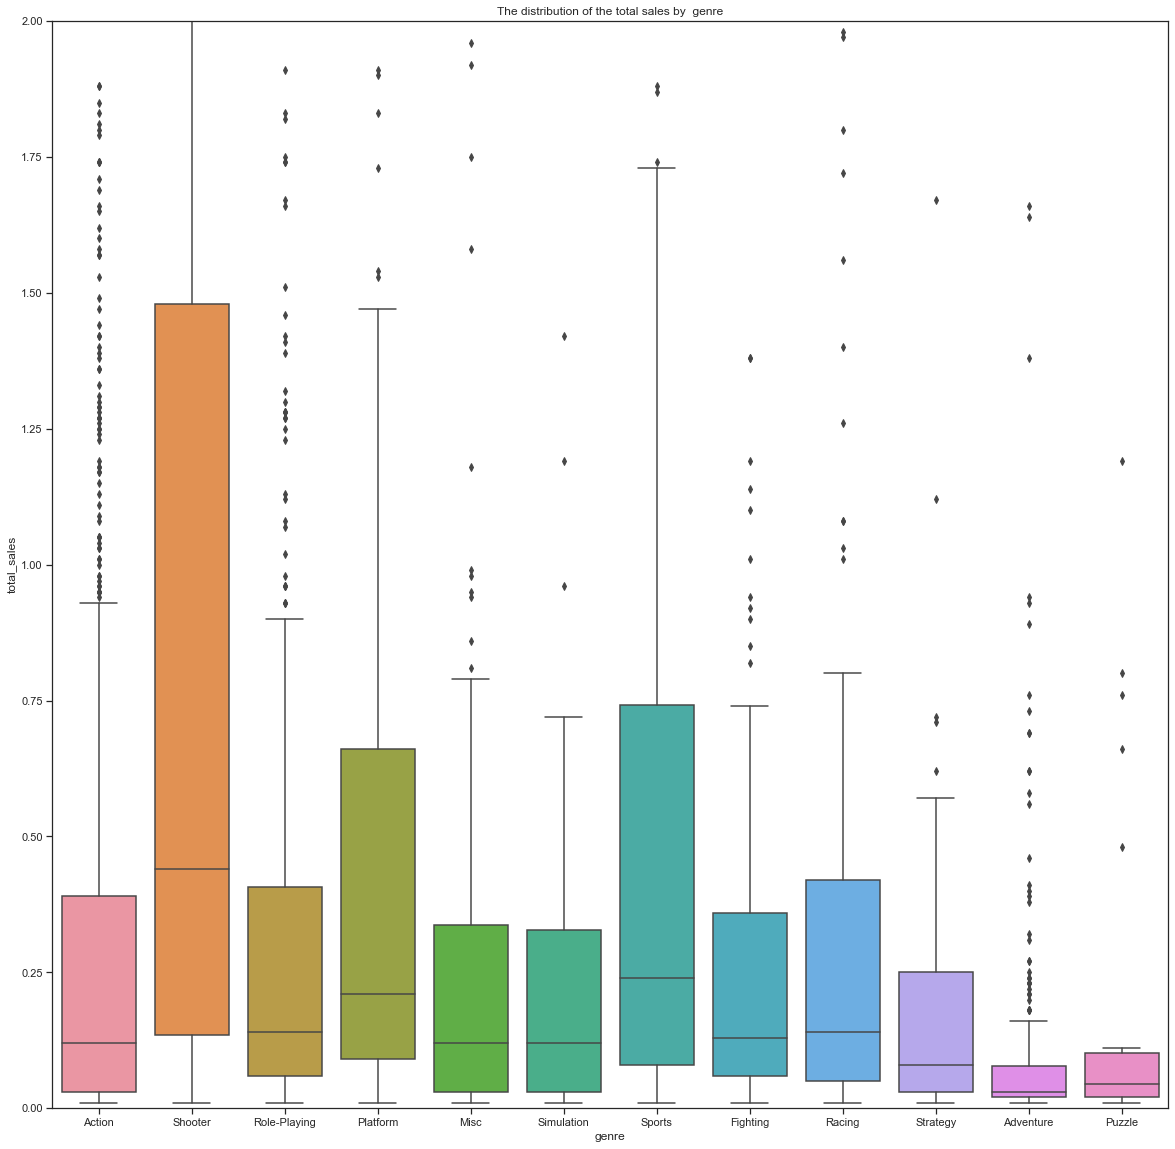

In [52]:
plt.figure(figsize=(20,20))
plt.ylim(0,2)
plt.title('The distribution of the total sales by genre')
sns.boxplot(x='genre',y='total_sales',data=df)
plt.show;

The most popular genres are `Platform`, `Shooter`, `Fighting`, `Sports`, `Action`, less popular `Adventure`, `Strategy`, `Puuzle`.

### Conclusion

During the analysis of the data, we found:

- Most of the games were released between 2006 and 2011, after which there is a noticeable decline in the production of games.
- The largest total sales of platforms such as PS4, PS3, X360 can be observed.
- We can see that the platform is relevant for an average of 9-11 years, then a new one takes its place.
- The actual period for the forecast for 2017 is the period from 2012 to 2016, since in this period of time one can observe both a decline and an increase in sales, and in addition, the emergence of new platforms.
- From profitable platforms it is possible to allocate X360, PS3, XOne, WiiU, Wii, they are in the lead on sales. In particular, there was a noticeable increase in sales in 2015, but in 2016 we can see a decline in sales across all platforms.
- On the examples of the X360 platform, we see that sales are growing with high ratings from users and critics.
- The most profitable genres are `Platform`, `Shooter`, `Fighting`, `Sports`, `Action`, less popular `Adventure`, `Strategy`, `Puuzle`.

## Compilation of a user profile of each region

### The most popular platforms (The Top - 5)

In [53]:
rating_pivot_table = df.pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
rating_pivot_table.columns = ['na_sales','jp_sales','eu_sales']

In [54]:
rating_pivot_table

,na_sales,jp_sales,eu_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


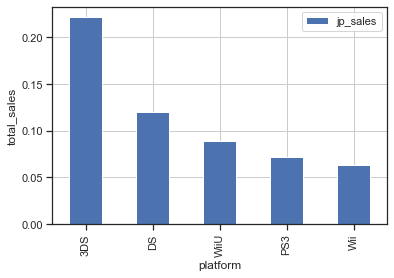

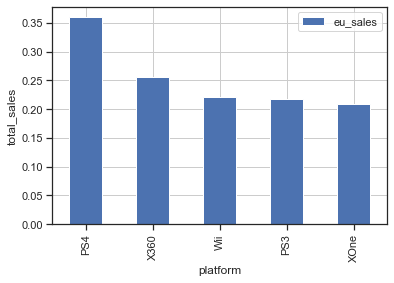

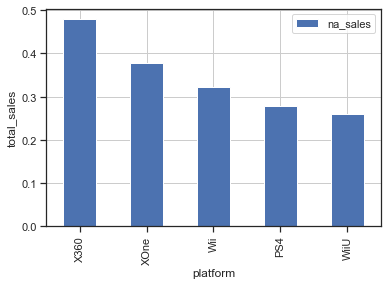

In [55]:
for top in ['jp_sales', 'eu_sales', 'na_sales']:
  (
      df
      .pivot_table(index='platform', values=top, aggfunc='mean')
      .sort_values(by=top, ascending=False)
      .head(5)
      .plot(kind='bar', grid=True)
  )
  plt.legend([top])
  plt.xlabel('platform')
  plt.ylabel('total_sales')
  plt.show()

In Japan, the most popular platforms are `3DS`, `WiiU`, `PS3`, `PSV`, `PS4`.

In Europe, the most popular platforms are `PS4`, `Wii`, `XOne`, `WiiU`, `X360`.

In North America, the most popular platforms are `XOne`, `WiiU`, `PS4`, `X360`, `Wii`.

### The most popular genres (The Top - 5)

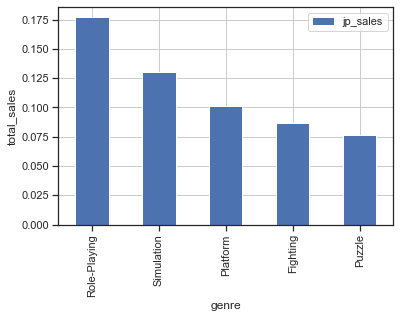

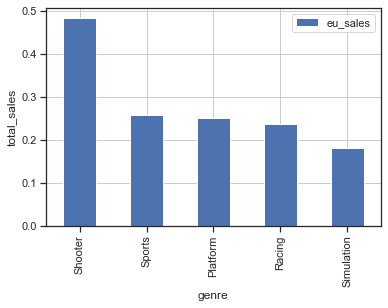

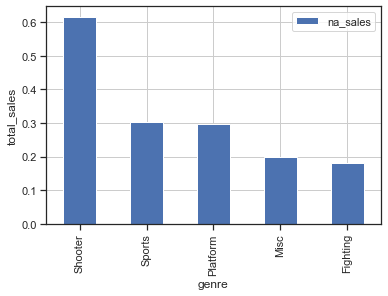

In [56]:
for genre in ['jp_sales', 'eu_sales', 'na_sales']:
    df.pivot_table(index='genre', values=genre, aggfunc='mean').sort_values(by=genre, ascending=False).head().plot(kind='bar', grid=True)
    plt.legend([genre])
    plt.xlabel('genre')
    plt.ylabel('total_sales')
    plt.show()

In Japan, the most popular genres are `Role-Playing`, `Simulation`, `Platform`, `Fighting`, `Puzzle`.

In Europe, the most popular genres are `Shooter`, `Sports`, `Platform`, `Racing`, `Simulation`.

In North America, the most popular genres are `Shooter`, `Sports`, `Platform`, `Misc`, `Fighting`.

### The impact of the ESRB rating on sales in a particular region.

In [57]:
esrb = df.fillna('No rating')

In [58]:
esrb = esrb.pivot_table(index = ['rating'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])


In [59]:
esrb

sum                  
          eu_sales jp_sales na_sales
rating                              
E           113.03    28.33   114.37
E10+         55.37     8.19    75.70
M           193.96    21.20   231.57
No rating    91.50   108.84   103.31
T            52.96    26.02    66.02

Europe and North America are dominated by 17+ rated games while Japan is dominated by unrated games.

### Conclusion

Based on the data, we can draw the following conclusions:

- The most popular platforms in Japan are 3DS, WiiU, PS3, PSV, PS4,
- The most popular platforms in Europe are PS4. Wii, XOne, WiiU, X360
- The most popular platforms in North America are XOne, WiiU, PS4, X360, Wii
- The most popular genre in Europe and North America is `Shooter`, and in Japan `Role-playing`, maybe this is due to the cultural characteristics of nations. As we are aware that cosplay is very popular in Japan.
- M (17+) rated games are the most popular in Europe and North America, while non-rated games are in Japan. It can be concluded that in Europe and North America the market is designed for an adult audience.

## Statistical data analysis

### Examining the first hypothesis

The following hypotheses need to be tested.

Null Hypothesis: The average user ratings of the Xbox One and PC platforms are the same.

Alternative hypothesis: The average user ratings of the Xbox One and PC platforms are different.


We need to apply the scipy.stats.ttest_ind() method in order to test the hypothesis that the mean of two populations is equal based on the samples taken from them.

In [60]:
pc = df.query('platform == "XOne"')['user_score'].dropna()
xbox_one =  df.query('platform == "PC"')['user_score'].dropna()
alpha = .05

results = st.ttest_ind(pc, xbox_one, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 0.5489537965134912
Failed to reject the null hypothesis


### Examining the second hypothesis

Null hypothesis: The average user ratings of the genres Action and Sports are different.

Alternative hypothesis: The average user ratings of the genres Action and Sports are the same.

We need to apply the st.ttest_1samp() method.

In [61]:
action = df.query('genre == "Action"')['user_score'].dropna()
sports =  df.query('genre == "Sports"')['user_score'].dropna()
alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 4.24307776572644e-20
Rejecting the null hypothesis


### Выводы

Hypothesis testing showed that the average user ratings of the Xbox One and PC platforms are the same, and the average user ratings of the Action and Sports genres are the same.

## Summary

In the course of this research, the data of the Strimchik online store was analyzed.

- The time of the relevance of games and platforms was studied, the platform is relevant on average for 9-11 years.
- The most popular platforms are `X360`, `PS3`, `XOne`, `WiiU`, `Wii`.
- The rating given by users and critics is related to the popularity of platforms, the higher the rating is , the higher the total sales are.
- The most profitable genres are `Platform`, `Shooter`, `Fighting`, `Sports`, `Action`, less profitable  are `Adventure`, `Strategy`, `Puuzle`.
- The most popular genre in Europe and North America is Shooter, while in Japan it is Role-playing.
- One of the most popular platforms in Europe, North America and Japan are WiiU and Wii.
- The average user ratings of the Xbox One and PC platforms are the same
- The average user ratings of the genres Action and Sports are the same.
- In 2017, the PS4, XOne and 3DS platforms will most likely be the leaders, and among the Shooter genres in North America and Europe, Role-playing in Japan.